In [1]:
#### Imports para entrenamiento, predicción y evaluación del modelo ####
#### NO QUITAR ####
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
#### Código Agregado ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Dividimos el Dataset para trabajar en equipo. Los criterios para dicha division fueron equidad en el tamaño de los subset a trabajar y similitud en los tipos de variable dentro del mismo.**

In [ ]:
fulldata = fulldata.set_index('SUSCRIBER_KEY')

In [ ]:
data_1 = fulldata[fulldata.columns[0:62]]
data_2 = fulldata[fulldata.columns[62:128]]
data_3 = fulldata[fulldata.columns[128:]]

# **Data_1**

In [2]:
data_1 = pd.read_csv ('data_1.csv')

In [3]:
pd.set_option('display.max_columns', 63)

In [3]:
data_1.head(10)

,SUSCRIBER_KEY,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,...,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3
0,E_63734494_20190215,8.58480,-82.38850,-82.43330,8.43330,3 - SILVER,2-PD,PD1,G4 STYLUS (H540),LG,...,0.0,15.09,5.06,1.00,12538,1121,866,0,38,0
1,E_66977552_20190518,8.58480,-82.38850,-82.43330,8.43330,4 - BRONZE,7-LOW,LOW3,NOT_IDENTIFIED,NOT_IDENTIFIED,...,0.0,0.00,0.00,0.00,0,0,0,0,0,0
2,E_69159695_20180116,8.12310,-81.07550,-78.16140,8.65525,3 - SILVER,6-OH,LOW4,NOT_IDENTIFIED,NOT_IDENTIFIED,...,0.0,0.42,0.00,0.09,57,0,0,0,0,0
3,E_65255730_20190416,9.08320,-79.59240,-79.51973,8.99360,3 - SILVER,7-LOW,LOW3,JENNY TV 2.8,BLU,...,0.0,0.14,0.00,0.00,7,0,0,65,0,0
4,E_67893872_20161201,9.08320,-79.59240,-79.51973,8.99360,3 - SILVER,3-DO,DO3,GALAXY J1 (SM-J111MDS),SAMSUNG,...,0.0,1.80,3.90,0.88,667,2078,83,128,110,9
5,E_65438949_20150630,8.58480,-82.38850,-82.61991,8.48255,1 - PLATINUM,1-HCV,HCV1,NOT_IDENTIFIED,NOT_IDENTIFIED,...,5.0,7.89,4.89,4.68,983,634,628,1661,871,582
6,E_69696838_20160305,8.79528,-80.14711,-79.65000,8.95000,4 - BRONZE,7-LOW,LOW4,GALAXY GRAND PRIME DUOS (SM-G532M DS),SAMSUNG,...,0.0,0.80,0.00,0.00,289,0,0,149,0,0
7,E_67625669_20180902,8.12310,-81.07550,-81.18114,8.14707,3 - SILVER,5-PV,PV1,NOT_IDENTIFIED,NOT_IDENTIFIED,...,3.0,0.00,0.00,0.00,0,0,0,0,0,0
8,E_68733613_20150701,8.62660,-80.36590,-80.54609,8.24183,1 - PLATINUM,6-OH,DO4,GALAXY J7 DUOS LTE (SM-J700HDS),SAMSUNG,...,6.0,0.75,3.29,1.61,216,622,543,51,206,20
9,E_66538076_20150630,8.79528,-80.14711,-79.65000,8.95000,2 - GOLD,3-DO,DO4,GALAXY CORE II (SM-G355M),SAMSUNG,...,0.0,1.90,2.53,4.56,133,292,713,120,10,0


In [4]:
#no hay valores de suscriber_key repetidos
data_1['SUSCRIBER_KEY'].nunique()

319222

In [5]:
# filas duplicadas
data_1[data_1.duplicated()]

,SUSCRIBER_KEY,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,...,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3


In [8]:
#No hay filas duplicadas.
data_1.duplicated().sum()

0

## **VALORES NULOS**

In [6]:
# columnas con valores nulos
for col in data_1.columns:
    if data_1[col].isnull().sum()>0:
        print(col)

LAT_PROV_BTS
LON_PROV_BTS
LAT_CITY_BTS
LON_CITY_BTS
DEVICE_MODEL_NAME
DEVICE_VENDOR_NAME
NETWORK_TECH


In [7]:
#cantidad de nulos por columna
nullcount = {col:data_1[col].isnull().sum() for col in data_1.columns}

In [11]:
nullcount

{'SUSCRIBER_KEY': 0,
 'LAT_PROV_BTS': 734,
 'LON_PROV_BTS': 734,
 'LAT_CITY_BTS': 734,
 'LON_CITY_BTS': 734,
 'VALUE_SEGMENT': 0,
 'SEGMENTATION': 0,
 'MICROSEGMENTATION': 0,
 'DEVICE_MODEL_NAME': 879,
 'DEVICE_VENDOR_NAME': 879,
 'NETWORK_TECH': 73408,
 'COMMERCIAL_ACTIVATION_DATE': 0,
 'TENURE_CUSTOMER': 0,
 'TENURE_CUSTOMER_BL': 0,
 'PREP_RECH_Q_EVT_X1': 0,
 'PREP_RECH_Q_EVT_X2': 0,
 'PREP_RECH_Q_EVT_X3': 0,
 'PREP_RECH_AMT_X1': 0,
 'PREP_RECH_AMT_X2': 0,
 'PREP_RECH_AMT_X3': 0,
 'PREP_RECH_Q_MON_12W': 0,
 'PREP_RECH_Q_TUE_12W': 0,
 'PREP_RECH_Q_WEN_12W': 0,
 'PREP_RECH_Q_THUR_12W': 0,
 'PREP_RECH_Q_FRI_12W': 0,
 'PREP_RECH_Q_SAT_12W': 0,
 'PREP_RECH_Q_SUN_12W': 0,
 'PREP_RECH_LAST_DAY_12W': 0,
 'PREP_RECH_NDAYS_LASTRECH_12W': 0,
 'PREP_RECH_CHNNL_MODE12W': 0,
 'PREP_RECH_Q_EVT_W1': 0,
 'PREP_RECH_Q_EVT_W2': 0,
 'PREP_RECH_Q_EVT_W3': 0,
 'PREP_RECH_Q_EVT_W4': 0,
 'PREP_RECH_Q_EVT_W5': 0,
 'PREP_RECH_Q_EVT_W6': 0,
 'PREP_RECH_Q_EVT_W7': 0,
 'PREP_RECH_Q_EVT_W8': 0,
 'PREP_RECH_Q_EVT_

In [12]:
missing = pd.Series(nullcount)

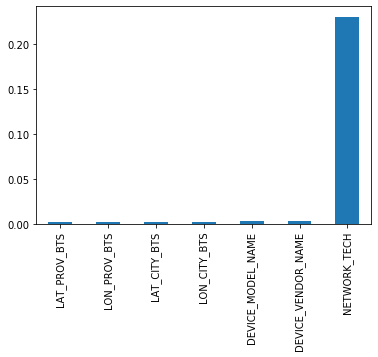

In [14]:
# Procentaje de valores nulos dentro de las columnas. Ninguna es mayor al 20%.
missing[missing>0].div(data_1.shape[0]).plot.bar()

### Tratamos la columna NETWORK TECH

In [21]:
#el valor mas repetido 
data_1['NETWORK_TECH'].mode()

0    LTE
dtype: object

In [8]:
# vemos el porcentaje con que se repite cada valor
data_1['NETWORK_TECH'].value_counts(normalize=True)

LTE    0.606979
3G     0.353381
2G     0.039640
Name: NETWORK_TECH, dtype: float64

In [9]:
#reemplazamos los valores nulos con LTE que es el valor mas frecuente
data_1.loc[data_1['NETWORK_TECH'].isnull(),'NETWORK_TECH']='LTE'

In [10]:
#corroboramos la cantidad de nulos que quedaron 
data_1['NETWORK_TECH'].isnull().sum()

0

### Tratamos el MODELO Y LA MARCA DEL DISPOSITIVO 

In [11]:
# vemos los diferentes valores y la cantidad del 'modelo del dispositivo'
data_1['DEVICE_MODEL_NAME'].value_counts()

NOT_IDENTIFIED                           43057
GALAXY GRAND PRIME DUOS (SM-G532M DS)    33608
GALAXY GRAND NEO (GT-I9060C)              9270
GALAXY J7 DUOS LTE (SM-J700MDS)           7627
Y5 2018 (DRA-LX3)                         6642
                                         ...  
GT-I9195L GALAXY S4 MINI LTE                 1
5 DS (TA-1044)                               1
M68                                          1
XT530                                        1
PEARL8120                                    1
Name: DEVICE_MODEL_NAME, Length: 2476, dtype: int64

In [35]:
# vemos los diferentes valores y la cantidad de la marca del dispositivo
data_1['DEVICE_VENDOR_NAME'].value_counts()

SAMSUNG           160363
HUAWEI             55359
NOT_IDENTIFIED     43936
LG                 16475
BLU                 9804
                   ...  
D-LINK                 1
GFEN                   1
LEFE                   1
KYOCERA                1
JINGWAH                1
Name: DEVICE_VENDOR_NAME, Length: 233, dtype: int64

In [27]:
# pido que me traiga las columnas donde la marca del dispositivo es nulo y veo que coincide cuando el modelo es nulo
data_1[data_1['DEVICE_VENDOR_NAME'].isnull()]

,SUSCRIBER_KEY,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W,PREP_RECH_LAST_DAY_12W,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,PREP_RECH_AMT_W1,PREP_RECH_AMT_W2,PREP_RECH_AMT_W3,PREP_RECH_AMT_W4,PREP_RECH_AMT_W5,PREP_RECH_AMT_W6,PREP_RECH_AMT_W7,PREP_RECH_AMT_W8,PREP_RECH_AMT_W9,PREP_RECH_AMT_W10,PREP_RECH_AMT_W11,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3
342,E_67000483_20150602,9.18520,-80.05350,-79.90011,9.35451,2 - GOLD,2-PD,PD1,NaN,NaN,3G,02-JUN-15,53,53,4,4,4,10.0,10.0,10.0,0,3,3,3,4,3,0,31-AUG-19,10,"EMG,1;MULE,1;UGW,4",0,3,0,3,0,3,0,3,0,3,3,0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,5.0,0.0,5.44,5.90,5.50,1838,1701,56,494,116,97
484,E_66513734_20150602,9.08320,-79.59240,-79.51973,8.99360,2 - GOLD,5-PV,PV1,NaN,NaN,LTE,02-JUN-15,53,53,4,5,6,30.0,45.0,60.0,5,0,3,4,5,0,0,29-AUG-19,12,"UGW,9",0,3,0,3,3,3,3,0,4,0,3,3,0.0,15.0,0.0,15.0,15.0,15.0,15.0,0.0,30.0,0.0,15.0,15.0,0.00,0.00,0.00,0,0,0,0,0,0
1187,E_69839536_20190325,8.79528,-80.14711,-79.88333,8.75000,2 - GOLD,2-PD,DO4,NaN,NaN,3G,25-MAR-19,7,7,6,4,3,18.0,20.0,5.0,0,3,0,5,0,3,4,07-SEP-19,3,"EMG,1;UGW,6",4,0,3,3,0,3,0,3,3,0,0,0,8.0,0.0,5.0,5.0,0.0,10.0,0.0,10.0,5.0,0.0,0.0,0.0,7.40,5.48,1.56,103,143,290,3264,4043,1019
1307,E_60955531_20190202,9.08320,-79.59240,-79.51973,8.99360,1 - PLATINUM,1-HCV,HCV1,NaN,NaN,LTE,02-FEB-19,9,9,10,17,10,40.0,72.0,36.5,7,7,10,5,6,4,6,03-SEP-19,7,"N/A,2;UGW,29",3,5,4,4,5,5,7,6,0,6,4,4,5.0,15.0,10.0,10.0,15.0,15.0,25.0,17.0,0.0,16.5,10.0,10.0,3.03,0.47,0.00,805,0,0,0,0,0
1652,E_63945743_20180809,9.08320,-79.59240,-79.51973,8.99360,3 - SILVER,4-VD,VD3,NaN,NaN,LTE,09-AUG-18,14,14,3,3,3,10.0,10.0,10.0,3,0,3,0,3,0,0,02-SEP-19,8,"UGW,3",3,0,0,0,0,3,0,0,0,3,0,0,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,3.16,3.78,3.38,78,164,138,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318218,E_67141210_20150602,8.58480,-82.38850,-82.42000,8.56000,4 - BRONZE,7-LOW,LOW4,NaN,NaN,LTE,02-JUN-15,53,53,0,3,3,0.0,3.0,5.0,0,0,0,0,0,4,0,03-AUG-19,38,"UGW,2",0,0,0,0,0,3,0,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.00,0.00,0.00,0,0,0,0,0,0
318268,E_66846793_20150602,9.08320,-79.59240,-79.51973,8.99360,2 - GOLD,3-DO,DO4,NaN,NaN,3G,02-JUN-15,53,53,4,3,3,30.0,15.0,15.0,0,3,3,3,0,0,3,29-AUG-19,12,"UGW,4",0,3,0,3,0,0,0,3,0,0,0,3,0.0,15.0,0.0,15.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,15.0,4.19,2.05,1.53,962,156,395,236,143,65
318380,E_66851117_20160602,9.18520,-80.05350,-79.90011,9.35451,4 - BRONZE,7-LOW,OH2,NaN,NaN,LTE,02-JUN-16,41,41,0,3,5,0.0,5.0,15.0,3,3,3,0,3,0,0,24-JUL-19,48,"UGW,4",0,0,0,0,0,0,3,0,0,4,0,3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,10.0,0.0,5.0,0.00,0.00,0.00,0,0,0,0,0,0
318745,E_69567789_20150701,9.08320,-79.59240,-79.95000,8.48333,3 - SILVER,6-OH,OH3,NaN,NaN,LTE,01-JUL-15,52,52,4,5,3,8.0,15.0,5.0,3,3,3,3,0,0,4,26-AUG-19,15,"UGW,6",0,3,3,0,3,0,0,4,0,3,0,0,0.0,3.0,5.0,0.0,5.0,0.0,0.0,10.0,0.0,5.0,0.0,0.0,0.00,0.31,0.15,0,29,66,0,0,0


In [12]:
# reemplazo la columna DEVICE_VENDOR_NAME por NOT_IDENTIFIED
data_1.loc[data_1['DEVICE_VENDOR_NAME'].isnull(),'DEVICE_VENDOR_NAME']='NOT_IDENTIFIED'

In [13]:
#Corroboro que quede en 0
data_1['DEVICE_VENDOR_NAME'].isnull().sum()

0

In [14]:
# reemplazo la columna DEVICE_MODEL_NAME por NOT_IDENTIFIED
data_1.loc[data_1['DEVICE_MODEL_NAME'].isnull(),'DEVICE_MODEL_NAME']='NOT_IDENTIFIED'

In [15]:
#Corroboro que quede en 0
data_1['DEVICE_MODEL_NAME'].isnull().sum()

0

### Tratamos LATITUD Y LONGITUD

In [16]:
# eliminamos las filas con los datos nulos de latitud de la provincia ( por ende se eliminaron los de las otras columnas que
# tenian latitud y longitud de la ciudad
data_1 = data_1[data_1['LAT_PROV_BTS'].notnull()]

In [17]:
data_1['LAT_PROV_BTS'].isnull().sum()

0

In [18]:
# corroboramos que no queden valores nulos en ninguna columna
for col in data_1.columns:
    if data_1[col].isnull().sum()>0:
        print(col)

## **VALORES MUY EXTREMOS / OUTLIERS**

### Tratamos la cantidad de recargas y el monto de recargas MENSUALES

(array([1, 2, 3]), <a list of 3 Text xticklabel objects>)

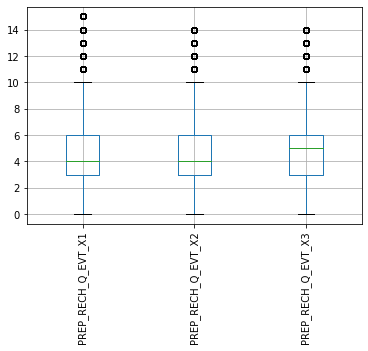

In [51]:
# vemos el comportamiento de la variable CANTIDAD DE RECARGAS MENSUALES en los ultimos 3 meses 
data_1.boxplot(['PREP_RECH_Q_EVT_X1','PREP_RECH_Q_EVT_X2','PREP_RECH_Q_EVT_X3'])
plt.xticks(rotation='vertical')

(array([1, 2, 3]), <a list of 3 Text xticklabel objects>)

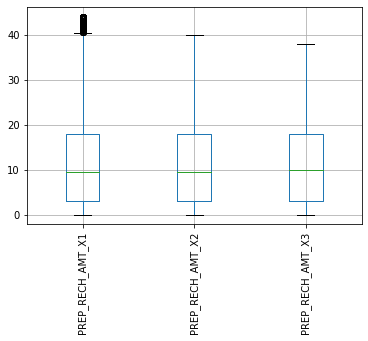

In [50]:
#vemos el comportamiento de la variable MONTO DE RECARGAS MENSUALES en los ultimos 3 meses 
data_1.boxplot(['PREP_RECH_AMT_X1','PREP_RECH_AMT_X2','PREP_RECH_AMT_X3'])
plt.xticks(rotation='vertical')

In [46]:
#Eliminamos valores muy extremos, y solo quedan las filas donde el valor sea menor o igual al quantile 99
#CANTIDAD DE RECARGAS ACUMULADAS MENSUALES 
data_1= data_1[data_1['PREP_RECH_Q_EVT_X1']<=data_1['PREP_RECH_Q_EVT_X1'].quantile(0.99)]
data_1= data_1[data_1['PREP_RECH_Q_EVT_X2']<=data_1['PREP_RECH_Q_EVT_X2'].quantile(0.99)]
data_1= data_1[data_1['PREP_RECH_Q_EVT_X3']<=data_1['PREP_RECH_Q_EVT_X3'].quantile(0.99)]

In [49]:
data_1.shape

(301429, 63)

In [47]:
#Eliminamos los valores muy extremos, y te quedas con las filas donde el valor sea menor o igual al quantile 99
#MONTO DE RECARGAS ACUMULADAS MENSUALES 
data_1= data_1[data_1['PREP_RECH_AMT_X1']<=data_1['PREP_RECH_AMT_X1'].quantile(0.99)]
data_1= data_1[data_1['PREP_RECH_AMT_X2']<=data_1['PREP_RECH_AMT_X2'].quantile(0.99)]
data_1= data_1[data_1['PREP_RECH_AMT_X3']<=data_1['PREP_RECH_AMT_X3'].quantile(0.99)]

In [48]:
data_1.shape

(301429, 63)

### Tratamos la cantidad de recargas y el monto de recargas SEMANALES

(array([1.42017e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.09869e+05,
        0.00000e+00, 3.58800e+04, 1.03350e+04, 0.00000e+00, 2.57900e+03,
        5.74000e+02, 0.00000e+00, 1.36000e+02, 3.00000e+01, 0.00000e+00,
        7.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.  ,  0.65,  1.3 ,  1.95,  2.6 ,  3.25,  3.9 ,  4.55,  5.2 ,
         5.85,  6.5 ,  7.15,  7.8 ,  8.45,  9.1 ,  9.75, 10.4 , 11.05,
        11.7 , 12.35, 13.  ]),
 <a list of 20 Patch objects>)

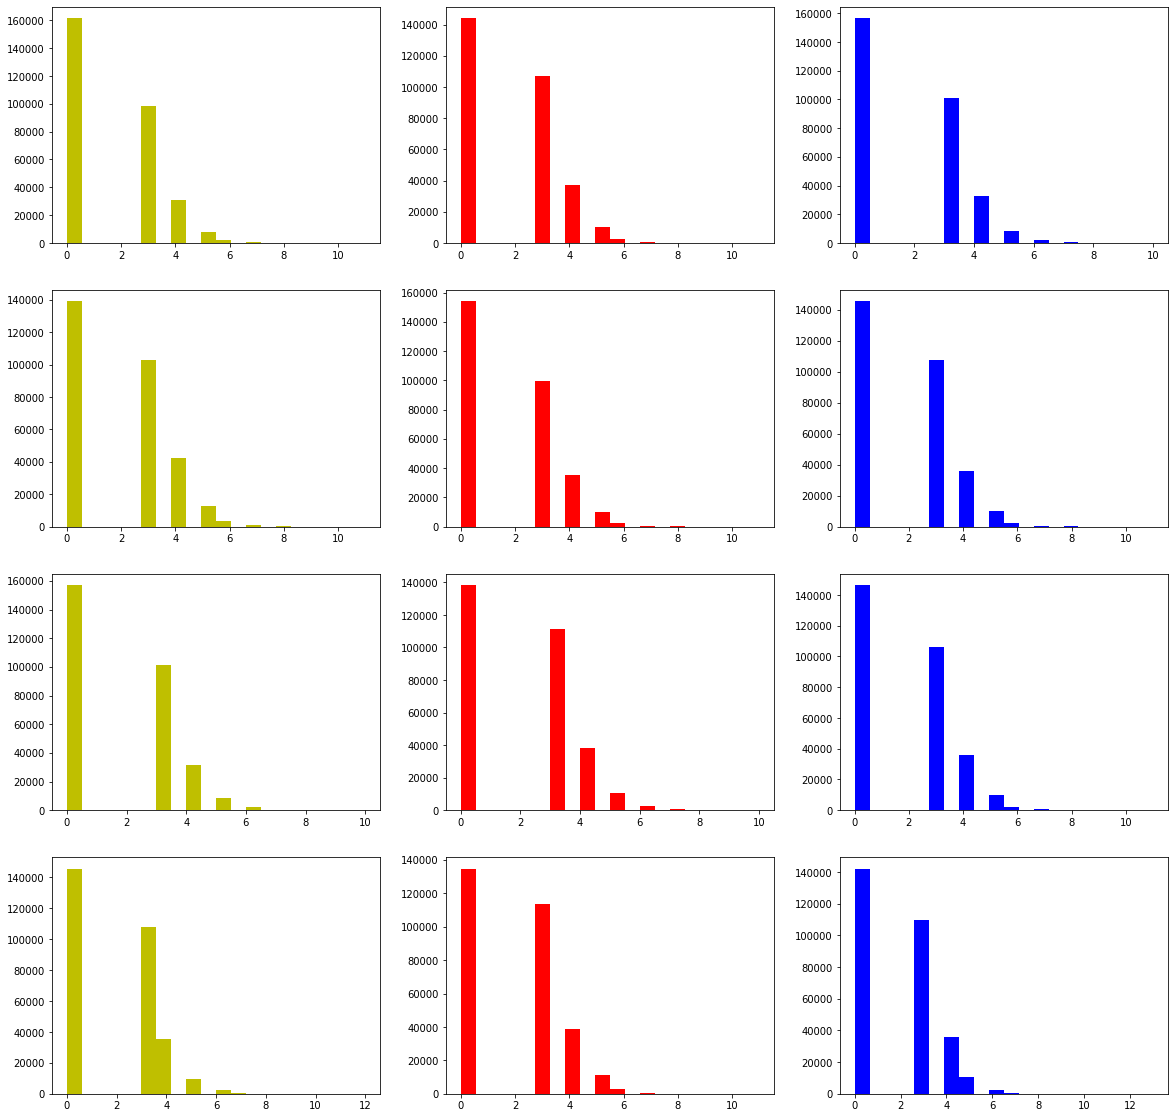

In [52]:
# CANTIDAD DE RECARGAS ACUMULADAS POR SEMANA (12 semanas)
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.hist(data_1['PREP_RECH_Q_EVT_W1'],bins = 20, color = 'y')
plt.subplot(4,3,2)
plt.hist(data_1['PREP_RECH_Q_EVT_W2'],bins = 20, color = 'r')
plt.subplot(4,3,3)
plt.hist(data_1['PREP_RECH_Q_EVT_W3'],bins = 20, color = 'b')
plt.subplot(4,3,4)
plt.hist(data_1['PREP_RECH_Q_EVT_W4'],bins = 20, color = 'y')
plt.subplot(4,3,5)
plt.hist(data_1['PREP_RECH_Q_EVT_W5'],bins = 20, color = 'r')
plt.subplot(4,3,6)
plt.hist(data_1['PREP_RECH_Q_EVT_W6'],bins = 20, color = 'b')
plt.subplot(4,3,7)
plt.hist(data_1['PREP_RECH_Q_EVT_W7'],bins = 20, color = 'y')
plt.subplot(4,3,8)
plt.hist(data_1['PREP_RECH_Q_EVT_W8'],bins = 20, color = 'r')
plt.subplot(4,3,9)
plt.hist(data_1['PREP_RECH_Q_EVT_W9'],bins = 20, color = 'b')
plt.subplot(4,3,10)
plt.hist(data_1['PREP_RECH_Q_EVT_W10'],bins = 20, color = 'y')
plt.subplot(4,3,11)
plt.hist(data_1['PREP_RECH_Q_EVT_W11'],bins = 20, color = 'r')
plt.subplot(4,3,12)
plt.hist(data_1['PREP_RECH_Q_EVT_W12'],bins = 20, color = 'b')

In [54]:
# seleccionamos todas las filas que tienen valores mayores al quantile 95 y las reemplazamos por el valor del quantile 95 
# CANTIDAD DE RECARGAS ACUMULADAS POR SEMANA 
data_1.loc[data_1['PREP_RECH_Q_EVT_W1']>data_1['PREP_RECH_Q_EVT_W1'].quantile(0.95),'PREP_RECH_Q_EVT_W1'] = data_1['PREP_RECH_Q_EVT_W1'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W2']>data_1['PREP_RECH_Q_EVT_W2'].quantile(0.95),'PREP_RECH_Q_EVT_W2'] = data_1['PREP_RECH_Q_EVT_W2'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W3']>data_1['PREP_RECH_Q_EVT_W3'].quantile(0.95),'PREP_RECH_Q_EVT_W3'] = data_1['PREP_RECH_Q_EVT_W3'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W4']>data_1['PREP_RECH_Q_EVT_W4'].quantile(0.95),'PREP_RECH_Q_EVT_W4'] = data_1['PREP_RECH_Q_EVT_W4'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W5']>data_1['PREP_RECH_Q_EVT_W5'].quantile(0.95),'PREP_RECH_Q_EVT_W5'] = data_1['PREP_RECH_Q_EVT_W5'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W6']>data_1['PREP_RECH_Q_EVT_W6'].quantile(0.95),'PREP_RECH_Q_EVT_W6'] = data_1['PREP_RECH_Q_EVT_W6'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W7']>data_1['PREP_RECH_Q_EVT_W7'].quantile(0.95),'PREP_RECH_Q_EVT_W7'] = data_1['PREP_RECH_Q_EVT_W7'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W8']>data_1['PREP_RECH_Q_EVT_W8'].quantile(0.95),'PREP_RECH_Q_EVT_W8'] = data_1['PREP_RECH_Q_EVT_W8'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W9']>data_1['PREP_RECH_Q_EVT_W9'].quantile(0.95),'PREP_RECH_Q_EVT_W9'] = data_1['PREP_RECH_Q_EVT_W9'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W10']>data_1['PREP_RECH_Q_EVT_W10'].quantile(0.95),'PREP_RECH_Q_EVT_W10'] = data_1['PREP_RECH_Q_EVT_W10'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W11']>data_1['PREP_RECH_Q_EVT_W11'].quantile(0.95),'PREP_RECH_Q_EVT_W11'] = data_1['PREP_RECH_Q_EVT_W11'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_EVT_W12']>data_1['PREP_RECH_Q_EVT_W12'].quantile(0.95),'PREP_RECH_Q_EVT_W12'] = data_1['PREP_RECH_Q_EVT_W12'].quantile(0.95)

In [55]:
# seleccionamos todas las filas que tienen valores mayores al quantile 95 y las reemplazamos por el valor del quantile 95 
# MONTO DE RECARGAS ACUMULADAS POR SEMANA 
data_1.loc[data_1['PREP_RECH_AMT_W1']>data_1['PREP_RECH_AMT_W1'].quantile(0.95),'PREP_RECH_AMT_W1'] = data_1['PREP_RECH_AMT_W1'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W2']>data_1['PREP_RECH_AMT_W2'].quantile(0.95),'PREP_RECH_AMT_W2'] = data_1['PREP_RECH_AMT_W2'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W3']>data_1['PREP_RECH_AMT_W3'].quantile(0.95),'PREP_RECH_AMT_W3'] = data_1['PREP_RECH_AMT_W3'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W4']>data_1['PREP_RECH_AMT_W4'].quantile(0.95),'PREP_RECH_AMT_W4'] = data_1['PREP_RECH_AMT_W4'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W5']>data_1['PREP_RECH_AMT_W5'].quantile(0.95),'PREP_RECH_AMT_W5'] = data_1['PREP_RECH_AMT_W5'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W6']>data_1['PREP_RECH_AMT_W6'].quantile(0.95),'PREP_RECH_AMT_W6'] = data_1['PREP_RECH_AMT_W6'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W7']>data_1['PREP_RECH_AMT_W7'].quantile(0.95),'PREP_RECH_AMT_W7'] = data_1['PREP_RECH_AMT_W7'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W8']>data_1['PREP_RECH_AMT_W8'].quantile(0.95),'PREP_RECH_AMT_W8'] = data_1['PREP_RECH_AMT_W8'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W9']>data_1['PREP_RECH_AMT_W9'].quantile(0.95),'PREP_RECH_AMT_W9'] = data_1['PREP_RECH_AMT_W9'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W10']>data_1['PREP_RECH_AMT_W10'].quantile(0.95),'PREP_RECH_AMT_W10'] = data_1['PREP_RECH_AMT_W10'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W11']>data_1['PREP_RECH_AMT_W11'].quantile(0.95),'PREP_RECH_AMT_W11'] = data_1['PREP_RECH_AMT_W11'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_AMT_W12']>data_1['PREP_RECH_AMT_W12'].quantile(0.95),'PREP_RECH_AMT_W12'] = data_1['PREP_RECH_AMT_W12'].quantile(0.95)


### Tratamos la cantidad de recargas cada dia de la SEMANA en las 12 semanas

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

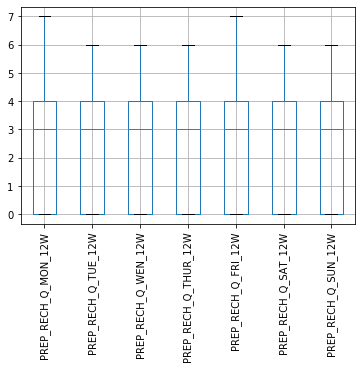

In [63]:
# comportamiento en los dias de la semana de cantidad de recargas en las 12 semanas
data_1.boxplot(['PREP_RECH_Q_MON_12W','PREP_RECH_Q_TUE_12W','PREP_RECH_Q_WEN_12W','PREP_RECH_Q_THUR_12W','PREP_RECH_Q_FRI_12W','PREP_RECH_Q_SAT_12W','PREP_RECH_Q_SUN_12W'])
plt.xticks(rotation='vertical')

In [62]:
## seleccionamos todas las filas con valores mayores al quantile 95 y las reemplazamos por el valor del quantile 95
data_1.loc[data_1['PREP_RECH_Q_MON_12W']>data_1['PREP_RECH_Q_MON_12W'].quantile(0.95),'PREP_RECH_Q_MON_12W'] = data_1['PREP_RECH_Q_MON_12W'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_TUE_12W']>data_1['PREP_RECH_Q_TUE_12W'].quantile(0.95),'PREP_RECH_Q_TUE_12W'] = data_1['PREP_RECH_Q_TUE_12W'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_WEN_12W']>data_1['PREP_RECH_Q_WEN_12W'].quantile(0.95),'PREP_RECH_Q_WEN_12W'] = data_1['PREP_RECH_Q_WEN_12W'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_THUR_12W']>data_1['PREP_RECH_Q_THUR_12W'].quantile(0.95),'PREP_RECH_Q_THUR_12W'] = data_1['PREP_RECH_Q_THUR_12W'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_FRI_12W']>data_1['PREP_RECH_Q_FRI_12W'].quantile(0.95),'PREP_RECH_Q_FRI_12W'] = data_1['PREP_RECH_Q_FRI_12W'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_SAT_12W']>data_1['PREP_RECH_Q_SAT_12W'].quantile(0.95),'PREP_RECH_Q_SAT_12W'] = data_1['PREP_RECH_Q_SAT_12W'].quantile(0.95)
data_1.loc[data_1['PREP_RECH_Q_SUN_12W']>data_1['PREP_RECH_Q_SUN_12W'].quantile(0.95),'PREP_RECH_Q_SUN_12W'] = data_1['PREP_RECH_Q_SUN_12W'].quantile(0.95)

### Tratamos el trafico de datos MENSUAL

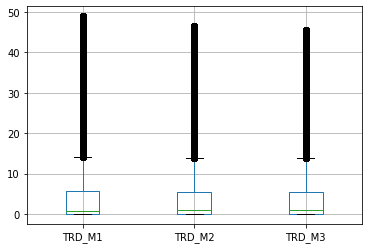

In [65]:
# Vemos el comportamiento de la variable en los ultimos 3 meses
data_1.boxplot(['TRD_M1','TRD_M2','TRD_M3'])

In [64]:
## Seleccionamos todas las filas que son mayores al quantile 99 y las reemplazamos por el valor del quantile 99 del 
# TRAFICO DE DATOS MENSUAL
data_1.loc[data_1['TRD_M1']>data_1['TRD_M1'].quantile(0.99),'TRD_M1'] = data_1['TRD_M1'].quantile(0.99)
data_1.loc[data_1['TRD_M2']>data_1['TRD_M2'].quantile(0.99),'TRD_M2'] = data_1['TRD_M2'].quantile(0.99)
data_1.loc[data_1['TRD_M3']>data_1['TRD_M3'].quantile(0.99),'TRD_M3'] = data_1['TRD_M3'].quantile(0.99)

### Tratamos el trafico de datos streaming MENSUAL

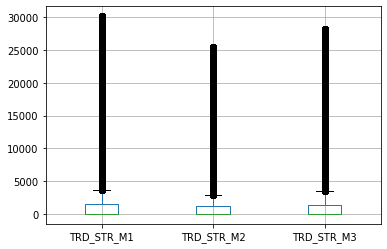

In [69]:
# Vemos el comportamiento de la variable en los ultimos 3 meses
data_1.boxplot(['TRD_STR_M1','TRD_STR_M2','TRD_STR_M3'])

In [68]:
# Seleccionamos todas las filas donde sus valores son mayores al quantile 99 y las reemplazamos por el valor del quantile 99  
data_1.loc[data_1['TRD_STR_M1']>data_1['TRD_STR_M1'].quantile(0.99),'TRD_STR_M1'] = data_1['TRD_STR_M1'].quantile(0.99)
data_1.loc[data_1['TRD_STR_M2']>data_1['TRD_STR_M2'].quantile(0.99),'TRD_STR_M2'] = data_1['TRD_STR_M2'].quantile(0.99)
data_1.loc[data_1['TRD_STR_M3']>data_1['TRD_STR_M3'].quantile(0.99),'TRD_STR_M3'] = data_1['TRD_STR_M3'].quantile(0.99)

### Tratamos el trafico de datos redes sociales MENSUAL

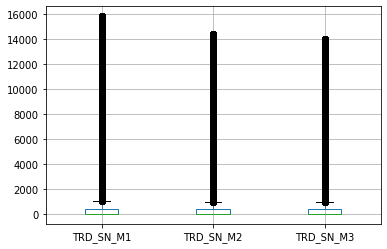

In [71]:
# Vemos el comportamiento de la variable en los ultimos 3 meses
data_1.boxplot(['TRD_SN_M1','TRD_SN_M2','TRD_SN_M3'])

In [70]:
# seleccionamos todas las filas donde sus valores son mayores al quantile 99 y las reemplazamos por el valor del quantile 99 

data_1.loc[data_1['TRD_SN_M1']>data_1['TRD_SN_M1'].quantile(0.99),'TRD_SN_M1'] = data_1['TRD_SN_M1'].quantile(0.99)
data_1.loc[data_1['TRD_SN_M2']>data_1['TRD_SN_M2'].quantile(0.99),'TRD_SN_M2'] = data_1['TRD_SN_M2'].quantile(0.99)
data_1.loc[data_1['TRD_SN_M3']>data_1['TRD_SN_M3'].quantile(0.99),'TRD_SN_M3'] = data_1['TRD_SN_M3'].quantile(0.99)

### Tratamos los DIAS desde la ultima recarga

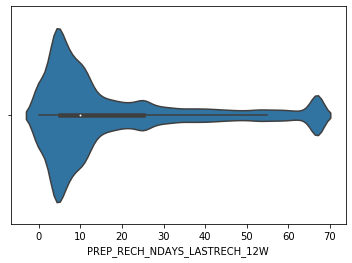

In [73]:
# Vemos el comportamiento de la variable 
sns.violinplot(data_1['PREP_RECH_NDAYS_LASTRECH_12W'])

In [72]:
# seleccionamos todas las filas donde sus valores son mayores al quantile 95 y las reemplazamos por el valor del quantile 95 
data_1.loc[data_1['PREP_RECH_NDAYS_LASTRECH_12W']>data_1['PREP_RECH_NDAYS_LASTRECH_12W'].quantile(0.95),'PREP_RECH_NDAYS_LASTRECH_12W'] = data_1['PREP_RECH_NDAYS_LASTRECH_12W'].quantile(0.95)

### Tratamos la ANTIGUEDAD y ANTIGUEDAD DESDE EL PRIMER GASTO

In [19]:
# Verificamos que la columna de ANTIGUEDAD y ANTIGUEDAD DESDE EL PRIMER GASTO, tienen todos sus valores iguales
(data_1.TENURE_CUSTOMER==data_1.TENURE_CUSTOMER_BL).value_counts()

True    318488
dtype: int64

In [42]:
#Eliminamos la coumna de ANTIGUEDAD DESDE EL PRIMER GASTO
data_1 = data_1.drop(['TENURE_CUSTOMER_BL'],axis=1)

### Tratamos el MODELO DEL DISPOSITIVO

In [21]:
## Disminuimos los diferentes tipos de datos dentro de la variable DEVICE_MODEL_NAME
model=data_1['DEVICE_MODEL_NAME'].value_counts(normalize=True)

In [22]:
otros=model[7:]
otros=otros.index.tolist()

In [23]:
data_1.loc[data_1['DEVICE_MODEL_NAME'].isin(otros),'DEVICE_MODEL_NAME']='OTROS'

In [24]:
data_1['DEVICE_MODEL_NAME'].value_counts()

OTROS                                    204994
NOT_IDENTIFIED                            43818
GALAXY GRAND PRIME DUOS (SM-G532M DS)     33507
GALAXY GRAND NEO (GT-I9060C)               9247
GALAXY J7 DUOS LTE (SM-J700MDS)            7611
Y5 2018 (DRA-LX3)                          6632
GALAXY J2 PRIME (SM-G532M)                 6453
Y9 2019 (JKM-LX3)                          6226
Name: DEVICE_MODEL_NAME, dtype: int64

### Tratamos la MARCA DEL DISPOSITIVO

In [25]:
## Disminuimos los diferentes tipos de datos dentro de la variable DEVICE_VENDOR_NAME
device=data_1['DEVICE_VENDOR_NAME'].value_counts(normalize=True)

In [26]:
otros_2=device[7:]
otros_2=otros_2.index.tolist()

In [27]:
data_1.loc[data_1['DEVICE_VENDOR_NAME'].isin(otros_2),'DEVICE_VENDOR_NAME']='OTROS'

In [28]:
data_1['DEVICE_VENDOR_NAME'].value_counts()

SAMSUNG           160001
HUAWEI             55278
NOT_IDENTIFIED     43818
OTROS              18958
LG                 16438
BLU                 9782
NOKIA               8566
APPLE               5647
Name: DEVICE_VENDOR_NAME, dtype: int64

## **TRANSFORMACIONES**

### Tratamos la FECHA DE ACTIVACION

In [29]:
#transformamos la columna comercial_activation_date que es tipo objeto a tipo fecha
data_1['COMMERCIAL_ACTIVATION_DATE'].head()

0    15-FEB-19
1    18-MAY-19
2    16-JAN-18
3    16-APR-19
4    01-DEC-16
Name: COMMERCIAL_ACTIVATION_DATE, dtype: object

In [30]:
data_1['COMMERCIAL_ACTIVATION_DATE']= pd.to_datetime(data_1['COMMERCIAL_ACTIVATION_DATE'])

### Tratamos ULTIMO DIA DE CARGA EN LAS 12 SEMANAS 

In [31]:
#transformamos la columna PREP_RECH_LAST_DAY_12W que es tipo objeto a tipo fecha
data_1['PREP_RECH_LAST_DAY_12W'].head()

0    19-AUG-19
1    03-JUL-19
2    02-SEP-19
3    01-SEP-19
4    05-SEP-19
Name: PREP_RECH_LAST_DAY_12W, dtype: object

In [32]:
data_1['PREP_RECH_LAST_DAY_12W']=pd.to_datetime(data_1['PREP_RECH_LAST_DAY_12W'])

### Tratamos SEGMENTO DE VALOR DEL CLIENTE 

In [33]:
# transfromar value_segment, que es el valor que le da la empresa al cliente, a INT
data_1['VALUE_SEGMENT']=pd.to_numeric(data_1['VALUE_SEGMENT'].str.split(' - ').str[0])

In [34]:
data_1['VALUE_SEGMENT'].value_counts()

3    113963
2     99814
1     52596
4     52115
Name: VALUE_SEGMENT, dtype: int64

In [37]:
data_1['DEVICE_MODEL_NAME'].value_counts()

OTROS                                    204994
NOT_IDENTIFIED                            43818
GALAXY GRAND PRIME DUOS (SM-G532M DS)     33507
GALAXY GRAND NEO (GT-I9060C)               9247
GALAXY J7 DUOS LTE (SM-J700MDS)            7611
Y5 2018 (DRA-LX3)                          6632
GALAXY J2 PRIME (SM-G532M)                 6453
Y9 2019 (JKM-LX3)                          6226
Name: DEVICE_MODEL_NAME, dtype: int64

In [45]:
data_1.shape

(318488, 62)